## TS 12 - Síntesis de cuadripolos simplemente cargados
#### Franco Ruggiero

### 1) Dada la siguiente transferencia de tensiones:

<img src="image1.png" style="width:400px ; height:200px">

## $T_{(s)} = \frac{V2}{Vg} = \frac{ks(s^2+\frac{1}{16})}{s^3+2s^2+2s+1}$

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transferencia de tension indicada, cargando a la entrada con una impedancia como se muestra en la figura.


b) Verificar la transferencia de tension del circuito obtenido.

c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.

> <img src="1_1.jpg" style="width:700px ; height:900px">
> <img src="1_2.jpg" style="width:700px ; height:900px">

In [39]:
import sympy as sp
from schemdraw import Drawing
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import analyze_sys
from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_serie, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_espaciador, dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Resolución simbólica
s = sp.symbols('s', complex=True)

In [51]:
# Sea la siguiente función de excitación
Z11 = (s*(s**2+2))/(2*s**2+1)

print_latex(a_equal_b_latex_s('Z_{11}(s)', Z11))

<IPython.core.display.Math object>

In [52]:
Y1, YL1 = remover_polo_dc(1/Z11, omega_zero=sp.Rational(1,4), isSigma=False)

print_latex(a_equal_b_latex_s('Y_{L1}(s)', YL1))
print_latex(a_equal_b_latex_s('Y_1(s)', Y1))

L1 = YL1.subs(s, 1)**(-1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [53]:
Z3, kk, L2, C2 = remover_polo_jw(1/Y1, omega=sp.Rational(1,4), isImpedance=True)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Z_3(s)', Z3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [54]:

Y4, YL3 = remover_polo_dc(1/Z3, isSigma=False)

print_latex(a_equal_b_latex_s('Y_{L3}(s)', YL3))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

L3 = k0.subs(s, 1)**(-1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

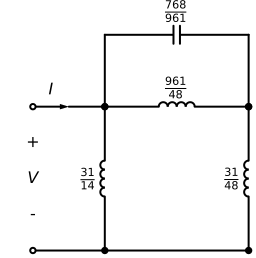

In [55]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'),
                        current_lbl = '$I$')

d = dibujar_elemento_derivacion(d, 'L', L1)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_elemento_derivacion(d, 'L', L3)

display(d)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

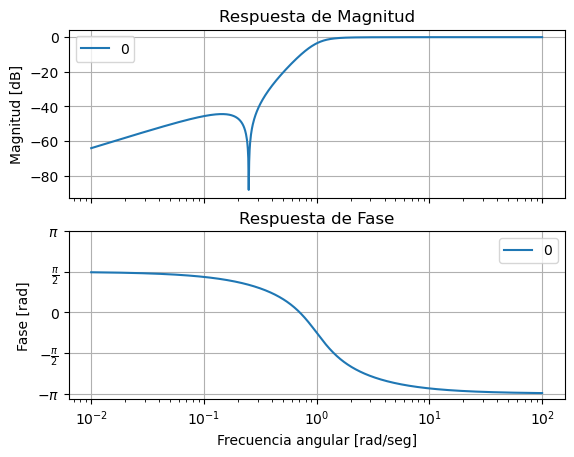

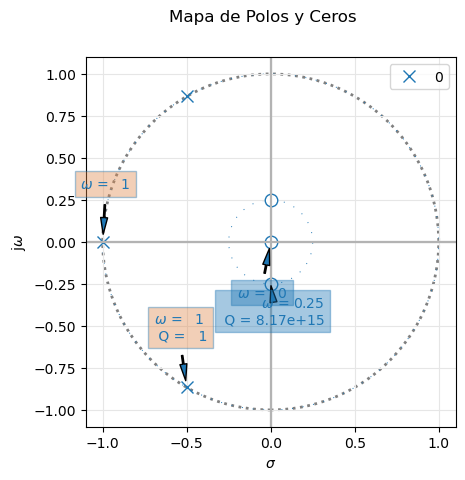

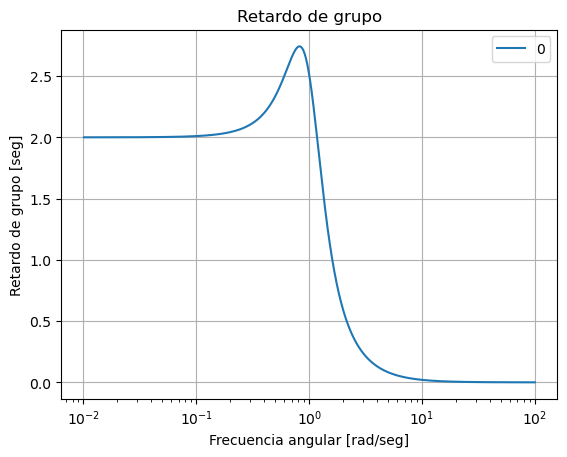

In [56]:
YA = 1/(s*L1)
YB = 1/(s*L2) + s*C2
YC = 1/(s*L3)

Y = sp.Matrix([[YA+YB, -YB],[-YB, YB + YC]])

det = Y.det()

Z11 = sp.factor(sp.simplify(Y[1,1]/det))
Z21 = sp.factor(sp.simplify(-Y[0,1]/det))

H = sig.TransferFunction( [1, 0, 1/16, 0], [1, 2, 2, 1] )

analyze_sys(H)

print_latex(a_equal_b_latex_s('Z_{11}(s)', Z11))
print_latex(a_equal_b_latex_s('Z_{21}(s)', Z21))
print_latex(a_equal_b_latex_s('\\frac{V_2}{V_1}(s)', sp.factor(Z21/(1+Z11))))


## $k = \frac{1}{16}$

### 2) Dada la siguiente transferencia de impedancia:

<img src="image2.png" style="width:400px ; height:190px">

## $T_{(s)} = \frac{V_2}{I_1} = \frac{k(s^2+9)}{s^3+2s^2+2s+1}$

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.

b) Verificar la transimpedancia del circuito obtenido.

c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.

> <img src="2_1.jpg" style="width:700px ; height:900px">
> <img src="2_2.jpg" style="width:700px ; height:700px">

In [11]:
# Sea la siguiente función de excitación
Z22 = (2*s**2+1)/(s*(s**2+2))

print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))

<IPython.core.display.Math object>

In [21]:
Y1, koo = remover_polo_infinito(1/Z22, omega_zero=3, isSigma=False)

print_latex(a_equal_b_latex_s('Y_{c1}(s)', koo))
print_latex(a_equal_b_latex_s('Y_1(s)', Y1))

C1 = koo.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
Z3, kk, L2, C2 = remover_polo_jw(1/Y1, omega=3, isImpedance=True)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Z_3(s)', Z3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
Y4, koo2 = remover_polo_infinito(1/Z3, isSigma=False)

print_latex(a_equal_b_latex_s('Y_{C3}(s)', koo2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

C3 = koo2.subs(s,1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

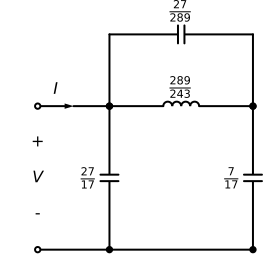

In [22]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'),
                        current_lbl = '$I$')

d = dibujar_elemento_derivacion(d, 'C', C3)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_elemento_derivacion(d, 'C', C1)

display(d)

In [23]:
YA = s*C3
YB = 1/(s*L2) + s*C2
YC = s*C1

Y = sp.Matrix([[YA+YB, -YB],[-YB, YB + YC]])

det = Y.det()

Z22 = sp.factor(sp.simplify(Y[0,0]/det))
Z21 = sp.factor(sp.simplify(-Y[0,1]/det))

print_latex(a_equal_b_latex_s('Z_{21}(s)', Z21))
print_latex(a_equal_b_latex_s('Z_{22}(s)', Z22))
print_latex(a_equal_b_latex_s('\\frac{V_2}{I_1}(s)', sp.factor(Z21/(1+Z22))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### $k = \frac{1}{9}$